# 单图像人脸关键点检测
## 实现功能：使用谷歌的Mediapipe人工智能框架，完成对单张图像的关键点检测

In [1]:
# 导入基础库
import cv2
import mediapipe as mp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
%matplotlib inline

E:\Anaconda\Lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 定义可视化图像
def look_img(img):
    # opencv读入的图像格式为BGR，而matplotlib的imshow函数需要RGB格式，因此需要转换下格式
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [3]:
mp_face_mesh = mp.solutions.face_mesh
help(mp_face_mesh)
# refine_landmarks 对眼睛、瞳孔的重点区域微调
# min_detection_confidence 最小置信度阈值([0.0, 1.0])
# min_tracking_confidence 最小追踪成功的面部地标置信度阈值([0.0, 1.0])

Help on module mediapipe.python.solutions.face_mesh in mediapipe.python.solutions:

NAME
    mediapipe.python.solutions.face_mesh - MediaPipe Face Mesh.

CLASSES
    mediapipe.python.solution_base.SolutionBase(builtins.object)
        FaceMesh
    
    class FaceMesh(mediapipe.python.solution_base.SolutionBase)
     |  FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
     |  
     |  MediaPipe Face Mesh.
     |  
     |  MediaPipe Face Mesh processes an RGB image and returns the face landmarks on
     |  each detected face.
     |  
     |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
     |  for usage examples.
     |  
     |  Method resolution order:
     |      FaceMesh
     |      mediapipe.python.solution_base.SolutionBase
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, static_image_mode=False, max_num_faces=1, re

In [4]:
model = mp_face_mesh.FaceMesh(
    static_image_mode=True, # 是否为静态图片，如果是，则每次输入的图片必须相同尺寸
    refine_landmarks=True, # 使用 Attention Mesh 模型，对眼睛、瞳孔周围的关键点精细定位
    min_detection_confidence=0.5, # 置信度阈值，越接近 1 越准确
    min_tracking_confidence=0.5 # 追踪成功率阈值，越接近 1 越准确
)

In [5]:
# 导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

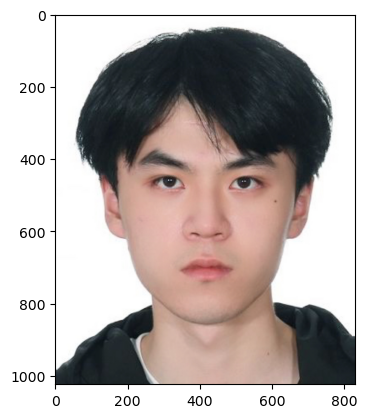

In [7]:
img = cv2.imread('../users_database/baojiachen.jpg')
look_img(img)

In [8]:
# BGR to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，并得到检测结果
results = model.process(img_RGB)

E:\Anaconda\Lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
# 预测出脸的个数
num_faces = len(results.multi_face_landmarks)
print(num_faces)

1


In [19]:
# 绘制人脸曲面和重点区域轮廓线，返回anntotate_image
annotate_image = img.copy() # 复制一份原始图像
if results.multi_face_landmarks: # 如果有检测到人脸
    for face_landmarks in results.multi_face_landmarks: # 遍历每一张人脸
        # 绘制人脸轮廓线
        mp_drawing.draw_landmarks(
            image=annotate_image, # 输入图像
            landmark_list=face_landmarks, # 关键点
            connections=mp_face_mesh.FACEMESH_TESSELATION, # 连接点
            landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=(66,77,229)), # 关键点样式,默认为None
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
        )
        
        # 绘制人脸轮廓线、眼睫毛、眼珠、嘴巴
        mp_drawing.draw_landmarks(
            image=annotate_image, # 输入图像
            landmark_list=face_landmarks, # 关键点
            connections=mp_face_mesh.FACEMESH_CONTOURS, # 连接点
            landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=5,color=(66,77,229)), # 关键点样式,默认为None
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()
        )
        
        # 绘制瞳孔区域
        mp_drawing.draw_landmarks(
            image=annotate_image, # 输入图像
            landmark_list=face_landmarks, # 关键点
            connections=mp_face_mesh.FACEMESH_IRISES, # 连接点
            landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=1,color=(10,169,77)), # 关键点样式,默认为None
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style()
        )

In [14]:
scaler = 1 # 文字大小
    
# 获取图像的宽高
h, w = img.shape[0], img.shape[1]
    
# BGR to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，并得到检测结果
results = model.process(img_RGB)

if results.multi_face_landmarks: # 如果有检测到人脸
        for face_landmarks in results.multi_face_landmarks: # 遍历每一张人脸
            # 绘制人脸轮廓线、眼睫毛、眼珠、嘴巴
            mp_drawing.draw_landmarks(
                image=img, # 输入图像
                landmark_list=face_landmarks, # 关键点
                connections=mp_face_mesh.FACEMESH_CONTOURS, # 连接点
                landmark_drawing_spec=mp_drawing.DrawingSpec(thickness=1,circle_radius=5,color=(66,77,229)), # 关键点样式,默认为None
                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()
            )
            
            # 遍历关键点，添加序号
            for idx,coord in enumerate(face_landmarks.landmark):# 遍历关键点
                cx = int(coord.x * w)
                cy = int(coord.y * h)
                # 图片、添加的文字、左上角的坐标、字体、字体大小、颜色、字体粗细
                img = cv2.putText(img, 'Face Detected', (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 1)
                img = cv2.putText(img, str(idx), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.3 * scaler, (0, 255, 0), 1)
else:
    # 如果没有检测到人脸，则提示
    # No face detected的提示只能是英文，否则会显示?????
    img = cv2.putText(img, 'No face detected!', (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

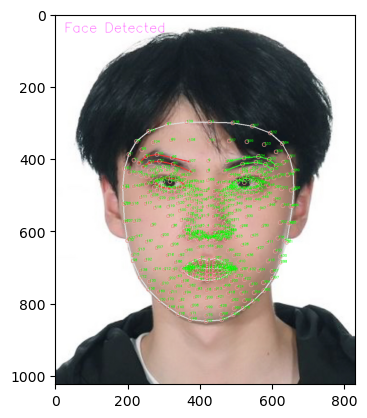

In [16]:
cv2.imwrite('../users_database/AUfaUnit_baojiachen.jpg', img)
look_img(img)

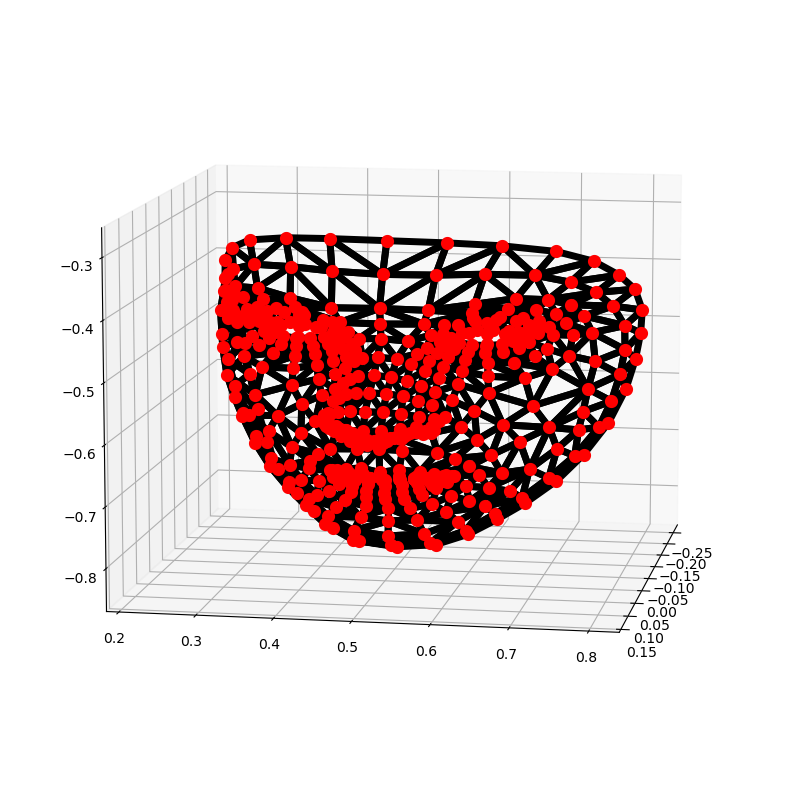

In [17]:
# 在三维坐标系中可视化
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_TESSELATION)

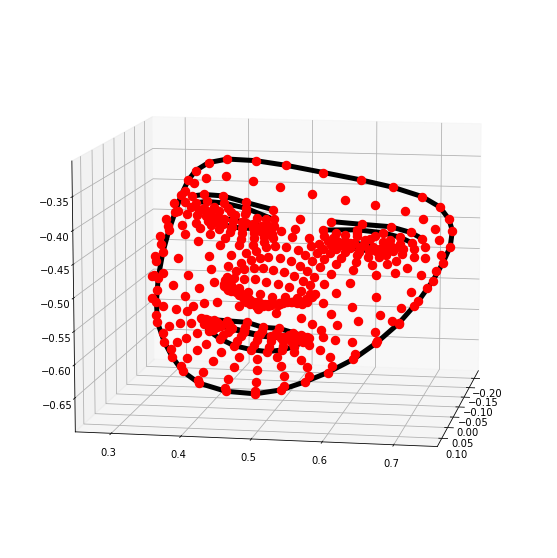

In [23]:
# 在三维坐标系中可视化
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_CONTOURS)

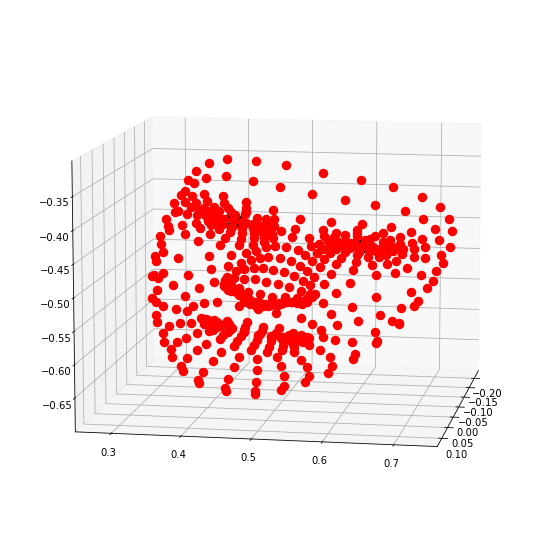

In [24]:
# 只有关键点与瞳孔
mp_drawing.plot_landmarks(results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_IRISES)